In [14]:
import numpy as np
import seaborn as sns
import torch
from torch.utils.data import TensorDataset, DataLoader

import res.process_data.process_output as out
from res.wgan.training import Training
from res.wgan.functions import get_noise
from res.process_data.dataset import tensor_dataset
from res.wgan.training import Training
from res.wgan.critic import Critic
import res.process_data.process_output as out
from res.wgan.genetator import Generator
import res.process_data.test_nn as test_nn

# write random datasets

<AxesSubplot:ylabel='Count'>

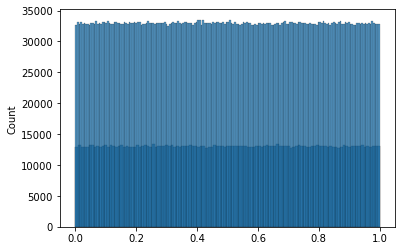

In [2]:
# for scalar
scalar_random = np.random.rand(100000, 15, 1)
sns.histplot(data=((scalar_random).reshape(15 * 100000)))
# for one hot vector
one_hot_random = np.random.rand(100000, 15, 4)
sns.histplot(data=((one_hot_random).reshape(15 * 100000 * 4)))

In [3]:
n_epochs = 20
z_dim = 8
display_step = 50
batch_size = 128
lr = 0.0003
beta_1 = 0.5
beta_2 = 0.999
c_lambda = 10
crit_repeats = 5
device = 'cpu'
shuffle = True
num_worker = 4
pin_memory = True

In [10]:
input_tensor = torch.Tensor(one_hot_random)
dataset = tensor_dataset(input_tensor, 15, 4)
dataloader = DataLoader(dataset= dataset,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_worker,
                            pin_memory=pin_memory)

In [11]:
gen = Generator(z_dim, im_dim=60, hidden_dim=16).to(device)
crit = Critic(im_dim=60, hidden_dim=16).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
crit_opt = torch.optim.Adam(crit.parameters(), lr=lr, betas=(beta_1, beta_2))

<AxesSubplot:ylabel='Count'>

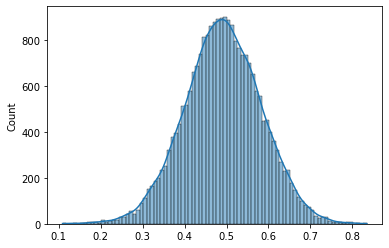

In [12]:
# check the output of generator before training
before_training = test_nn.check_output(gen, 100, 16, 8, 15)
sns.histplot(data=before_training, kde=True)

Train model

In [13]:
Training(n_epochs, dataloader, device, crit_repeats, gen, gen_opt,
             crit, crit_opt, z_dim, c_lambda, display_step)

  0%|          | 0/782 [00:00<?, ?it/s]

Step 50: Generator loss: 0.0843969950452447, critic loss: 9.67638082122803
Step 100: Generator loss: 0.12392368704080582, critic loss: 9.85897365951538
Step 150: Generator loss: -0.02690855272114277, critic loss: 9.983544704437255
Step 200: Generator loss: -8.489632892012596, critic loss: -1.3775000600814813
Step 250: Generator loss: -3.9717601308971644, critic loss: 3.0863621640205383
Step 300: Generator loss: 0.24811928123235702, critic loss: 7.493245607376098
Step 350: Generator loss: -3.3130146837234498, critic loss: 8.603679397583008
Step 400: Generator loss: -8.952256860733032, critic loss: 4.092100370407105
Step 450: Generator loss: -10.056695194244385, critic loss: 2.067047994613647
Step 500: Generator loss: -6.803121042251587, critic loss: 0.6065633349418635
Step 550: Generator loss: -10.485255823135375, critic loss: 0.8913886008262637
Step 600: Generator loss: -17.319935302734375, critic loss: 1.7443662014007568


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/connection.py"

KeyboardInterrupt: 

In [ ]:
# save the model
# torch.save({'gen_state_dict': gen.state_dict()}, 'wgan_gen_one_hot_random.pth.tar')
# torch.save({'crit_state_dict': crit.state_dict()}, 'wgan_crit_scalar_random.pth.tar')

In [ ]:
# load the model
# create a new model, same structure as the previous one
gen_model = Generator(z_dim, im_dim=60, hidden_dim=16).to(device)
crit_model = Critic(im_dim=60, hidden_dim=16).to(device)
# get the state from stored file
gen_checkpoint = torch.load('wgan_gen_one_hot_random.pth.tar')
crit_chechpoint = torch.load('wgan_crit_one_hot_random.pth.tar')
# load the state to the new model
gen_model.load_state_dict(gen_checkpoint['gen_state_dict'])
crit_model.load_state_dict(crit_chechpoint['crit_state_dict'])

In [ ]:
# check the output
after_training = test_nn.check_output(gen_model, 100, 16, 8, 15)
sns.histplot(data=after_training, kde=True)